# Noite 2017-11-17 -> Extrai espectros
Reducao de dados de espectroscopia no visivel de asteroides da familia de asteroides Lixiahoua, obtidos com GOODMAN no SOAR 

### path dos dados comprimidos

In [1]:
datapath = '/home/mario/projetos/espectros/soar/lixis/2017-11-17'
#definindo locais dos arquivos de calibacao
mbiasfile = '/home/mario/projetos/espectros/soar/lixis/2017-11-17/ZERO/mbias.fits'
mflatm2file = '/home/mario/projetos/espectros/soar/lixis/2017-11-17/flat/400_m2/mflatm2.fits'

### importando modulos

In [2]:
%matplotlib inline
import os
import shutil
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import spectool

ModuleNotFoundError: No module named 'spectool'

In [3]:
!ls $datapath

106085	297403	39260	    dummy  hyades64    l115-271-2  l98-978-2	 ZERO
138668	34339	56970	    flat   hyades64-2  l93-101	   Ne
18483	39094	compressed  HgAr   l115-271    l98-978	   object_empty


# ESTRELAS

# l98-978

In [4]:
!ls $datapath/l98-978/400_m2
# defininfo caminho 
pestrela = datapath+'/l98-978/400_m2'

0201_SO2017B-015_1117.fits    database
0202_SO2017B-015_1117.fits    fbt0201_SO2017B-015_1117.fits
0203_SO2017B-015_1117.fits    fbt0202_SO2017B-015_1117.fits
acq			      fbt0203_SO2017B-015_1117.fits
bt0201_SO2017B-015_1117.fits  t0201_SO2017B-015_1117.fits
bt0202_SO2017B-015_1117.fits  t0202_SO2017B-015_1117.fits
bt0203_SO2017B-015_1117.fits  t0203_SO2017B-015_1117.fits


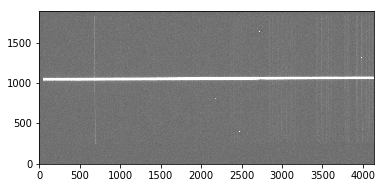

0203_SO2017B-015_1117 l98-978 60.0 1.5"_long_slit 1.44 


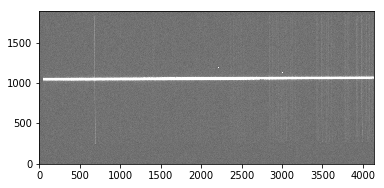

0202_SO2017B-015_1117 l98-978 60.0 1.5"_long_slit 1.44 


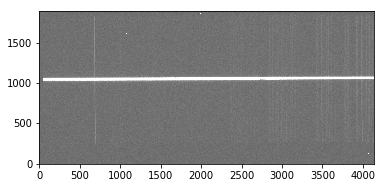

0201_SO2017B-015_1117 l98-978 60.0 1.5"_long_slit 1.45 


In [5]:
# primeiro organizando imagens de aquisicao
spectool.reduc.organize_acquisition(pestrela)
# checando as imagens
est = glob(pestrela+'/0*.fits')
for im in est:
    img = spectool.Image(im)
    img.view()
    #imprimindo path e contagem média da imagem
    print img.name, img.object, img.texp, img.slit, img.airmass, img.note
    

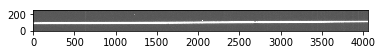

fbt0203_SO2017B-015_1117.fits 60.0 38.387652683


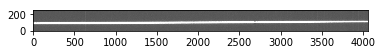

fbt0202_SO2017B-015_1117.fits 60.0 36.7214489495


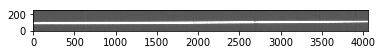

fbt0201_SO2017B-015_1117.fits 60.0 35.3864985697


In [6]:
# trimming images and removing bias and correcting flat
for img in est:
    timg = spectool.reduc.calib.trim(img)
    btimg = spectool.reduc.calib.biascorrect(timg.path, mbiasfile)
    fbtimg = spectool.reduc.calib.flatcorrect(btimg.path, mflatm2file, plot=True)
    print fbtimg.name, fbtimg.texp, np.mean(fbtimg.arr)

fbt0201_SO2017B-015_1117


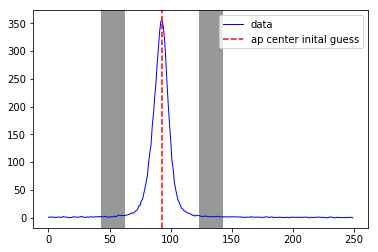

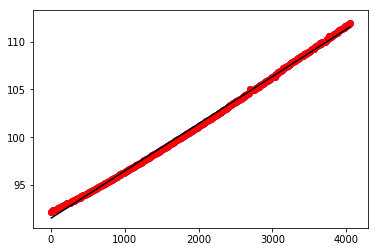

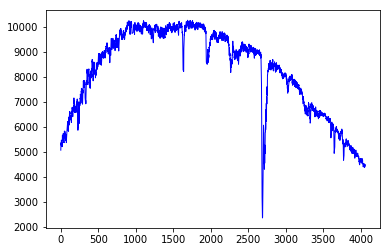

fbt0202_SO2017B-015_1117


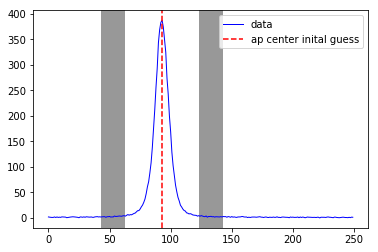

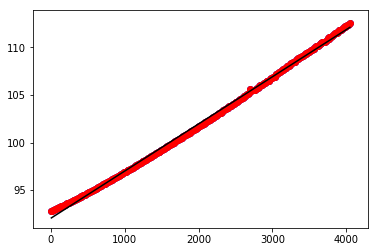

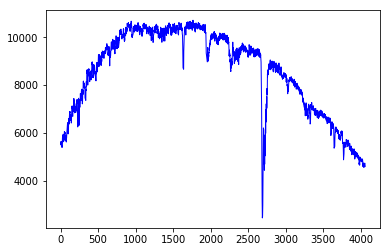

fbt0203_SO2017B-015_1117


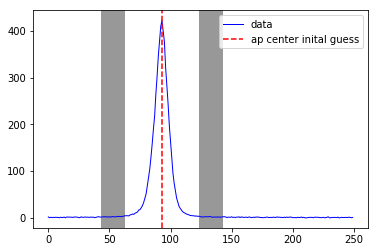

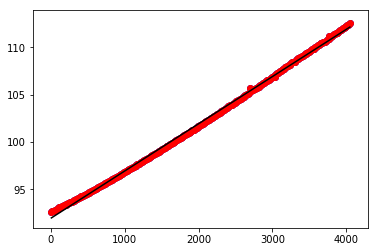

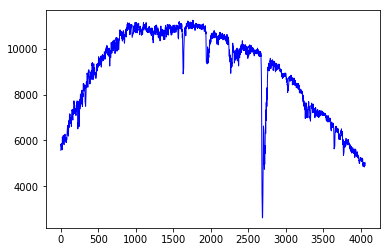

In [7]:
# extraindo espectros
fbt_est = glob(pestrela+'/fbt0*.fits')
for img in fbt_est:
    sp_ext = spectool.reduc.apext.SpecExt(img)
    print sp_ext.img.name
    sp_ext.plotapt()
    sp_ext.apall()

# Asteroides

## 39094

In [8]:
!ls $datapath/39094/400_m2
# defininfo caminho 
past = datapath+'/39094/400_m2'

0247_SO2017B-015_1117.fits    fbt0247_SO2017B-015_1117.fits
0248_SO2017B-015_1117.fits    fbt0248_SO2017B-015_1117.fits
0249_SO2017B-015_1117.fits    fbt0249_SO2017B-015_1117.fits
acq			      t0247_SO2017B-015_1117.fits
bt0247_SO2017B-015_1117.fits  t0248_SO2017B-015_1117.fits
bt0248_SO2017B-015_1117.fits  t0249_SO2017B-015_1117.fits
bt0249_SO2017B-015_1117.fits


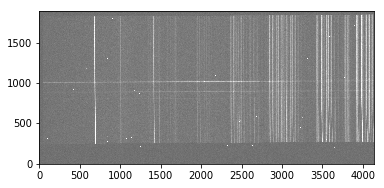

0248_SO2017B-015_1117 39094 600.0 1.5"_long_slit 1.48 


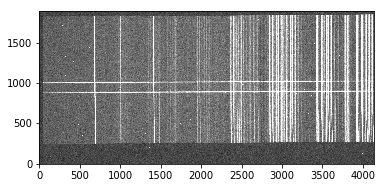

0249_SO2017B-015_1117 39094 600.0 1.5"_long_slit 1.5 


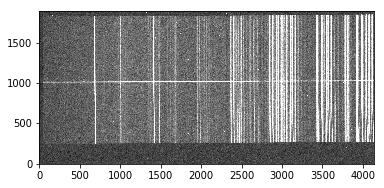

0247_SO2017B-015_1117 39094 600.0 1.5"_long_slit 1.45 


In [9]:
# primeiro organizando imagens de aquisicao
spectool.reduc.organize_acquisition(past)
# checando as imagens
ast = glob(past+'/0*.fits')
for im in ast:
    img = spectool.Image(im)
    img.view()
    #imprimindo path e contagem média da imagem
    print img.name, img.object, img.texp, img.slit, img.airmass, img.note
    

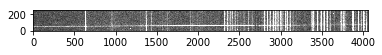

fbt0248_SO2017B-015_1117.fits 600.0 8.1212011504


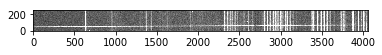

fbt0249_SO2017B-015_1117.fits 600.0 9.01714518255


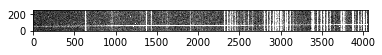

fbt0247_SO2017B-015_1117.fits 600.0 7.81573151294


In [10]:
# trimming images and removing bias and correcting flat
for img in ast:
    timg = spectool.reduc.calib.trim(img)
    btimg = spectool.reduc.calib.biascorrect(timg.path, mbiasfile)
    fbtimg = spectool.reduc.calib.flatcorrect(btimg.path, mflatm2file, plot=True)
    print fbtimg.name, fbtimg.texp, np.mean(fbtimg.arr)

fbt0249_SO2017B-015_1117


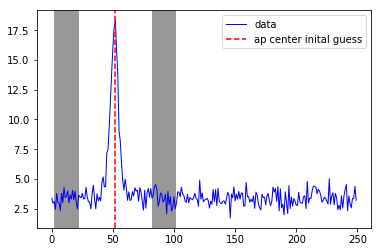

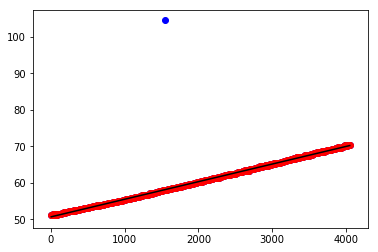

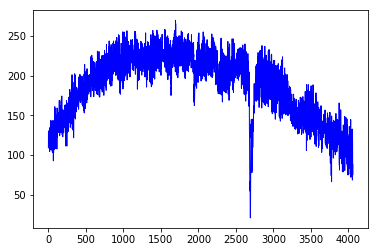

fbt0248_SO2017B-015_1117


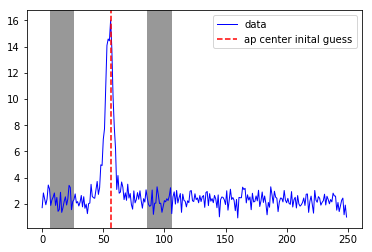

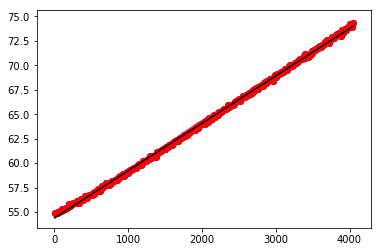

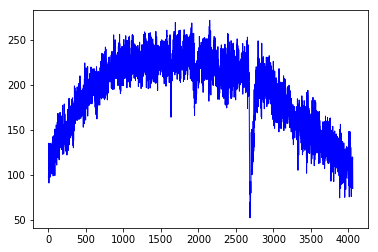

fbt0247_SO2017B-015_1117


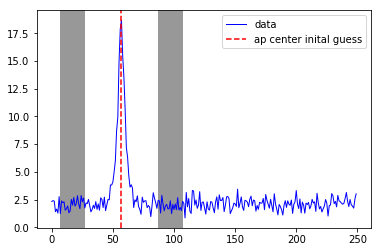

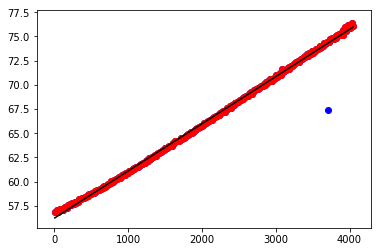

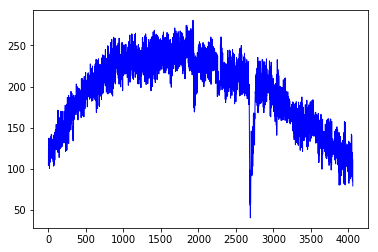

In [11]:
# extraindo espectros
fbt_ast = glob(past+'/fbt0*.fits')
for img in fbt_ast:
    sp_ext = spectool.reduc.apext.SpecExt(img)
    print sp_ext.img.name
    sp_ext.plotapt()
    sp_ext.apall()